In [2]:
#Importer les librairies utiles

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from scipy import stats
from scipy.stats import norm, skew

import sys, os
import random

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
from IPython import display, utils

In [3]:
#Read csv files
solar_wind = pd.read_csv("archive/solar_wind.csv")
solar_wind.timedelta = pd.to_timedelta(solar_wind.timedelta)
solar_wind.set_index(["period", "timedelta"], inplace=True)

dst = pd.read_csv("archive/dst_labels.csv")
dst.timedelta = pd.to_timedelta(dst.timedelta)
dst.set_index(["period", "timedelta"], inplace=True)

sunspots = pd.read_csv("archive/sunspots.csv")
sunspots.timedelta = pd.to_timedelta(sunspots.timedelta)
sunspots.set_index(["period", "timedelta"], inplace=True)

In [4]:
dst.groupby("period").describe()

dst                                                    
           count       mean        std    min   25%   50%  75%   max
period                                                              
train_a  28824.0 -16.576707  26.083191 -387.0 -26.0 -12.0 -1.0  65.0
train_b  52584.0  -9.695154  16.443049 -223.0 -17.0  -7.0  1.0  59.0
train_c  58464.0  -9.556325  16.506404 -374.0 -16.0  -7.0  0.0  67.0

In [5]:
print("Solar wind shape: ", solar_wind.shape)
solar_wind.head()

Solar wind shape:  (8392320, 15)


bx_gse  by_gse  bz_gse  theta_gse  phi_gse  bx_gsm  \
period  timedelta                                                             
train_a 0 days 00:00:00   -5.55    3.00    1.25      11.09   153.37   -5.55   
        0 days 00:01:00   -5.58    3.16    1.17      10.10   151.91   -5.58   
        0 days 00:02:00   -5.15    3.66    0.85       7.87   146.04   -5.15   
        0 days 00:03:00   -5.20    3.68    0.68       6.17   146.17   -5.20   
        0 days 00:04:00   -5.12    3.68    0.49       4.62   145.72   -5.12   

                         by_gsm  bz_gsm  theta_gsm  phi_gsm    bt  density  \
period  timedelta                                                            
train_a 0 days 00:00:00    3.00    1.25      11.09   153.37  6.80     1.53   
        0 days 00:01:00    3.16    1.17      10.10   151.91  6.83     1.69   
        0 days 00:02:00    3.66    0.85       7.87   146.04  6.77     1.97   
        0 days 00:03:00    3.68    0.68       6.17   146.17  6.74     1.97   
        0 days 00:04:00    3.68    0.49       4.62   145.72  6.65     1.77   

                          speed  temperature source  
period  timedelta                                    
train_a 0 days 00:00:00  383.92     110237.0     ac  
        0 days 00:01:00  381.79     123825.0     ac  
        0 days 00:02:00  389.11      82548.0     ac  
        0 days 00:03:00  389.11      82548.0     ac  
        0 days 00:04:00  384.26      94269.0     ac

In [6]:
print("Sunspot shape: ", sunspots.shape)
sunspots.head()

Sunspot shape:  (192, 1)


smoothed_ssn
period  timedelta              
train_a 0 days             65.4
        13 days            72.0
        44 days            76.9
        74 days            80.8
        105 days           85.4

In [7]:
solar_wind.groupby("period").describe().T

period                  train_a       train_b       train_c
bx_gse      count  1.575012e+06  3.084130e+06  3.407290e+06
            mean  -1.781301e+00 -3.088789e-01 -4.619076e-01
            std    4.339212e+00  3.627830e+00  3.245485e+00
            min   -5.463000e+01 -2.937000e+01 -4.546000e+01
            25%   -4.960000e+00 -3.070000e+00 -2.800000e+00
...                         ...           ...           ...
temperature min    1.000000e+04  1.496000e+03  0.000000e+00
            25%    4.364900e+04  3.741400e+04  4.007400e+04
            50%    7.923800e+04  8.552400e+04  7.152100e+04
            75%    1.325500e+05  1.873250e+05  1.310880e+05
            max    6.223700e+06  4.206672e+06  5.751308e+06

[112 rows x 3 columns]

In [8]:
sunspots.groupby("period").describe().T

period                 train_a     train_b    train_c
smoothed_ssn count   40.000000   72.000000  80.000000
             mean   136.902500   51.850000  24.313750
             std     34.563168   39.200266  19.020414
             min     65.400000    3.900000   2.200000
             25%    108.375000   15.325000   7.775000
             50%    151.500000   43.150000  20.500000
             75%    164.400000   91.225000  38.525000
             max    175.200000  116.400000  69.500000

plt.style.use('fivethirtyeight')
def show_raw_visualization(data):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), dpi=80)
    for i, key in enumerate(data.columns):
        t_data = data[key]
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            title=f"{key.capitalize()}",
            rot=25,color='teal', lw=1.2
        )

    fig.subplots_adjust(hspace=0.8)
    plt.tight_layout()


cols_to_plot = ["bx_gse", "bx_gsm", "bt", "density", "speed", "temperature"]
show_raw_visualization(solar_wind[cols_to_plot].iloc[:1000])

In [9]:
solar_wind.isnull().sum()

bx_gse         325888
by_gse         325888
bz_gse         325888
theta_gse      325888
phi_gse        326388
bx_gsm         325888
by_gsm         325888
bz_gsm         325888
theta_gsm      325888
phi_gsm        326388
bt             325888
density        684890
speed          689555
temperature    811768
source         316816
dtype: int64

<Figure size 1440x1080 with 0 Axes>

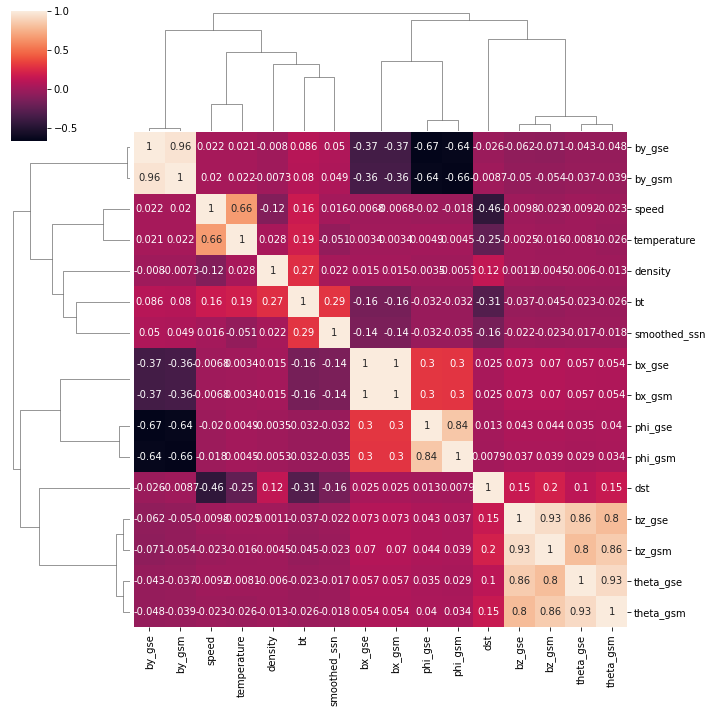

In [12]:
joined = solar_wind.join(sunspots).join(dst).fillna(method="ffill")


plt.figure(figsize=(20, 15))
sns.clustermap(joined.corr(), annot=True)

In [14]:
from sklearn.preprocessing import StandardScaler

# subset of solar wind features to use for modeling
SOLAR_WIND_FEATURES = [
    "bt",
    "temperature",
    "bx_gse",
    "by_gse",
    "bz_gse",
    "speed",
    "density",
]

# all of the features we'll use, including sunspot numbers
XCOLS = (
    [col + "_mean" for col in SOLAR_WIND_FEATURES]
    + [col + "_std" for col in SOLAR_WIND_FEATURES]
    + ["smoothed_ssn"]
)


def impute_features(feature_df):
    """Imputes data using the following methods:
    - `smoothed_ssn`: forward fill
    - `solar_wind`: interpolation
    """
    # forward fill sunspot data for the rest of the month
    feature_df.smoothed_ssn = feature_df.smoothed_ssn.fillna(method="ffill")
    # interpolate between missing solar wind values
    feature_df = feature_df.interpolate()
    return feature_df


def aggregate_hourly(feature_df, aggs=["mean", "std"]):
    """Aggregates features to the floor of each hour using mean and standard deviation.
    e.g. All values from "11:00:00" to "11:59:00" will be aggregated to "11:00:00".
    """
    # group by the floor of each hour use timedelta index
    agged = feature_df.groupby(
        ["period", feature_df.index.get_level_values(1).floor("H")]
    ).agg(aggs)
    # flatten hierachical column index
    agged.columns = ["_".join(x) for x in agged.columns]
    return agged


def preprocess_features(solar_wind, sunspots, scaler=None, subset=None):
    """
    Preprocessing steps:
        - Subset the data
        - Aggregate hourly
        - Join solar wind and sunspot data
        - Scale using standard scaler
        - Impute missing values
    """
    # select features we want to use
    if subset:
        solar_wind = solar_wind[subset]

    # aggregate solar wind data and join with sunspots
    hourly_features = aggregate_hourly(solar_wind).join(sunspots)

    # subtract mean and divide by standard deviation
    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(hourly_features)

    normalized = pd.DataFrame(
        scaler.transform(hourly_features),
        index=hourly_features.index,
        columns=hourly_features.columns,
    )

    # impute missing values
    imputed = impute_features(normalized)

    # we want to return the scaler object as well to use later during prediction
    return imputed, scaler

In [16]:
features, scaler = preprocess_features(solar_wind, sunspots, subset=SOLAR_WIND_FEATURES)
print(features.shape)
features.head()

(139872, 15)


bt_mean    bt_std  temperature_mean  \
period  timedelta                                               
train_a 0 days 00:00:00  0.499705  2.443614         -0.375267   
        0 days 01:00:00  0.547177 -0.224580         -0.479430   
        0 days 02:00:00  0.739905 -0.770240         -0.574831   
        0 days 03:00:00  0.699098 -0.278783         -0.324709   
        0 days 04:00:00  0.223933 -0.225168         -0.313432   

                         temperature_std  bx_gse_mean  bx_gse_std  \
period  timedelta                                                   
train_a 0 days 00:00:00         0.383941    -1.599207   -0.381502   
        0 days 01:00:00         0.953178    -1.757995   -0.867747   
        0 days 02:00:00        -0.192518    -1.912116   -1.114317   
        0 days 03:00:00         0.325491    -1.809045   -0.783042   
        0 days 04:00:00         0.201600    -1.338802   -0.484910   

                         by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period  timedelta                                                           
train_a 0 days 00:00:00     0.419516    0.031658     0.300358   -0.651645   
        0 days 01:00:00     0.179257   -0.272971     0.446103   -0.517913   
        0 days 02:00:00     0.183266   -0.822786     0.770174   -0.876490   
        0 days 03:00:00    -0.378111    0.341156     0.621194   -0.290211   
        0 days 04:00:00     0.072745    1.023019     0.467629   -0.478080   

                         speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                           
train_a 0 days 00:00:00   -0.738546   0.862524     -0.775827    -0.205724   
        0 days 01:00:00   -0.986904   0.995063     -0.861692    -0.058215   
        0 days 02:00:00   -1.013548   0.554085     -0.846222    -0.220012   
        0 days 03:00:00   -0.826469  -0.211185     -0.404306     0.218373   
        0 days 04:00:00   -0.601238   1.016033     -0.371487     0.097253   

                         smoothed_ssn  
period  timedelta                      
train_a 0 days 00:00:00      0.139444  
        0 days 01:00:00      0.139444  
        0 days 02:00:00      0.139444  
        0 days 03:00:00      0.139444  
        0 days 04:00:00      0.139444

In [19]:
assert (features.isna().sum() == 0).all()

In [22]:
features.tail()

bt_mean    bt_std  temperature_mean  \
period  timedelta                                                  
train_c 2435 days 19:00:00 -0.373195 -0.603216         -0.573749   
        2435 days 20:00:00 -0.361778 -0.685802         -0.459343   
        2435 days 21:00:00 -0.343314 -0.627469         -0.696052   
        2435 days 22:00:00 -0.294586 -0.480459         -0.636097   
        2435 days 23:00:00 -0.347630 -0.799574         -0.685058   

                            temperature_std  bx_gse_mean  bx_gse_std  \
period  timedelta                                                      
train_c 2435 days 19:00:00        -0.277435    -0.786889    0.193293   
        2435 days 20:00:00        -0.330459    -0.879799   -0.324388   
        2435 days 21:00:00        -0.542954    -0.129810   -0.507779   
        2435 days 22:00:00        -0.450009    -0.501061   -0.046987   
        2435 days 23:00:00        -0.508701    -0.462118   -0.611519   

                            by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period  timedelta                                                              
train_c 2435 days 19:00:00     0.288681    0.883954     0.084079   -0.066701   
        2435 days 20:00:00     0.364257   -0.156353    -0.453439   -0.136271   
        2435 days 21:00:00     1.034010   -0.835876    -0.637484   -0.500943   
        2435 days 22:00:00     0.751568   -0.302671    -0.762433    0.010161   
        2435 days 23:00:00     0.685695   -0.674289    -0.970162   -0.634404   

                            speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                              
train_c 2435 days 19:00:00   -0.929683  -0.202618     -0.389517    -0.153967   
        2435 days 20:00:00   -0.963039  -0.395391     -0.506260    -0.126292   
        2435 days 21:00:00   -0.820623  -0.476841     -0.512106    -0.134324   
        2435 days 22:00:00   -0.870759  -0.308719     -0.554921    -0.074525   
        2435 days 23:00:00   -0.866072  -0.584249     -0.516121     0.101349   

                            smoothed_ssn  
period  timedelta                         
train_c 2435 days 19:00:00     -0.297739  
        2435 days 20:00:00     -0.297739  
        2435 days 21:00:00     -0.297739  
        2435 days 22:00:00     -0.297739  
        2435 days 23:00:00     -0.297739

In [32]:
from sklearn.model_selection import train_test_split

def get_train_test_val(data, test_per_period, val_per_period):
    """Splits data across periods into train, test, and validation"""
    # assign the last `test_per_period` rows from each period to test
    test = data.groupby("period").tail(test_per_period)
    interim = data[~data.index.isin(test.index)]
    # assign the last `val_per_period` from the remaining rows to validation
    val = data.groupby("period").tail(val_per_period)
    # the remaining rows are assigned to train
    train = interim[~interim.index.isin(val.index)]
    return train, test, val


train, test, val = get_train_test_val(features, test_per_period=6_000, val_per_period=3_000)

test.head()

bt_mean    bt_std  temperature_mean  \
period  timedelta                                                 
train_a 951 days 00:00:00 -0.750759  0.234958         -0.321374   
        951 days 01:00:00 -0.791318  0.284752         -0.319784   
        951 days 02:00:00 -0.980331  0.573975         -0.257948   
        951 days 03:00:00 -1.043536 -0.412378         -0.209809   
        951 days 04:00:00 -0.993770 -0.603035         -0.189010   

                           temperature_std  bx_gse_mean  bx_gse_std  \
period  timedelta                                                     
train_a 951 days 00:00:00        -0.263304     0.437479   -0.443221   
        951 days 01:00:00        -0.301259     0.321370    0.422124   
        951 days 02:00:00        -0.344924     0.530721    0.818555   
        951 days 03:00:00        -0.397676     0.753977   -0.432534   
        951 days 04:00:00        -0.402766     0.789420   -0.391195   

                           by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period  timedelta                                                             
train_a 951 days 00:00:00    -0.202748    0.318096     0.849393   -0.020478   
        951 days 01:00:00    -0.240443    0.166232     0.776471   -0.220270   
        951 days 02:00:00    -0.137579    0.157993     0.147218   -0.276363   
        951 days 03:00:00    -0.157578   -0.430909     0.121454   -0.282263   
        951 days 04:00:00    -0.252788   -0.372368    -0.149991   -0.510691   

                           speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                             
train_a 951 days 00:00:00   -0.145924  -0.503193     -0.407614    -0.315154   
        951 days 01:00:00   -0.127991  -0.084971     -0.427620    -0.198320   
        951 days 02:00:00   -0.120626  -0.310757     -0.435274    -0.374498   
        951 days 03:00:00   -0.180313  -0.531222     -0.414209    -0.365694   
        951 days 04:00:00   -0.219717  -0.649039     -0.437909    -0.267683   

                           smoothed_ssn  
period  timedelta                        
train_a 951 days 00:00:00      2.113449  
        951 days 01:00:00      2.113449  
        951 days 02:00:00      2.113449  
        951 days 03:00:00      2.113449  
        951 days 04:00:00      2.113449

array([<AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>,
       <AxesSubplot:xlabel='period,timedelta'>], dtype=object)

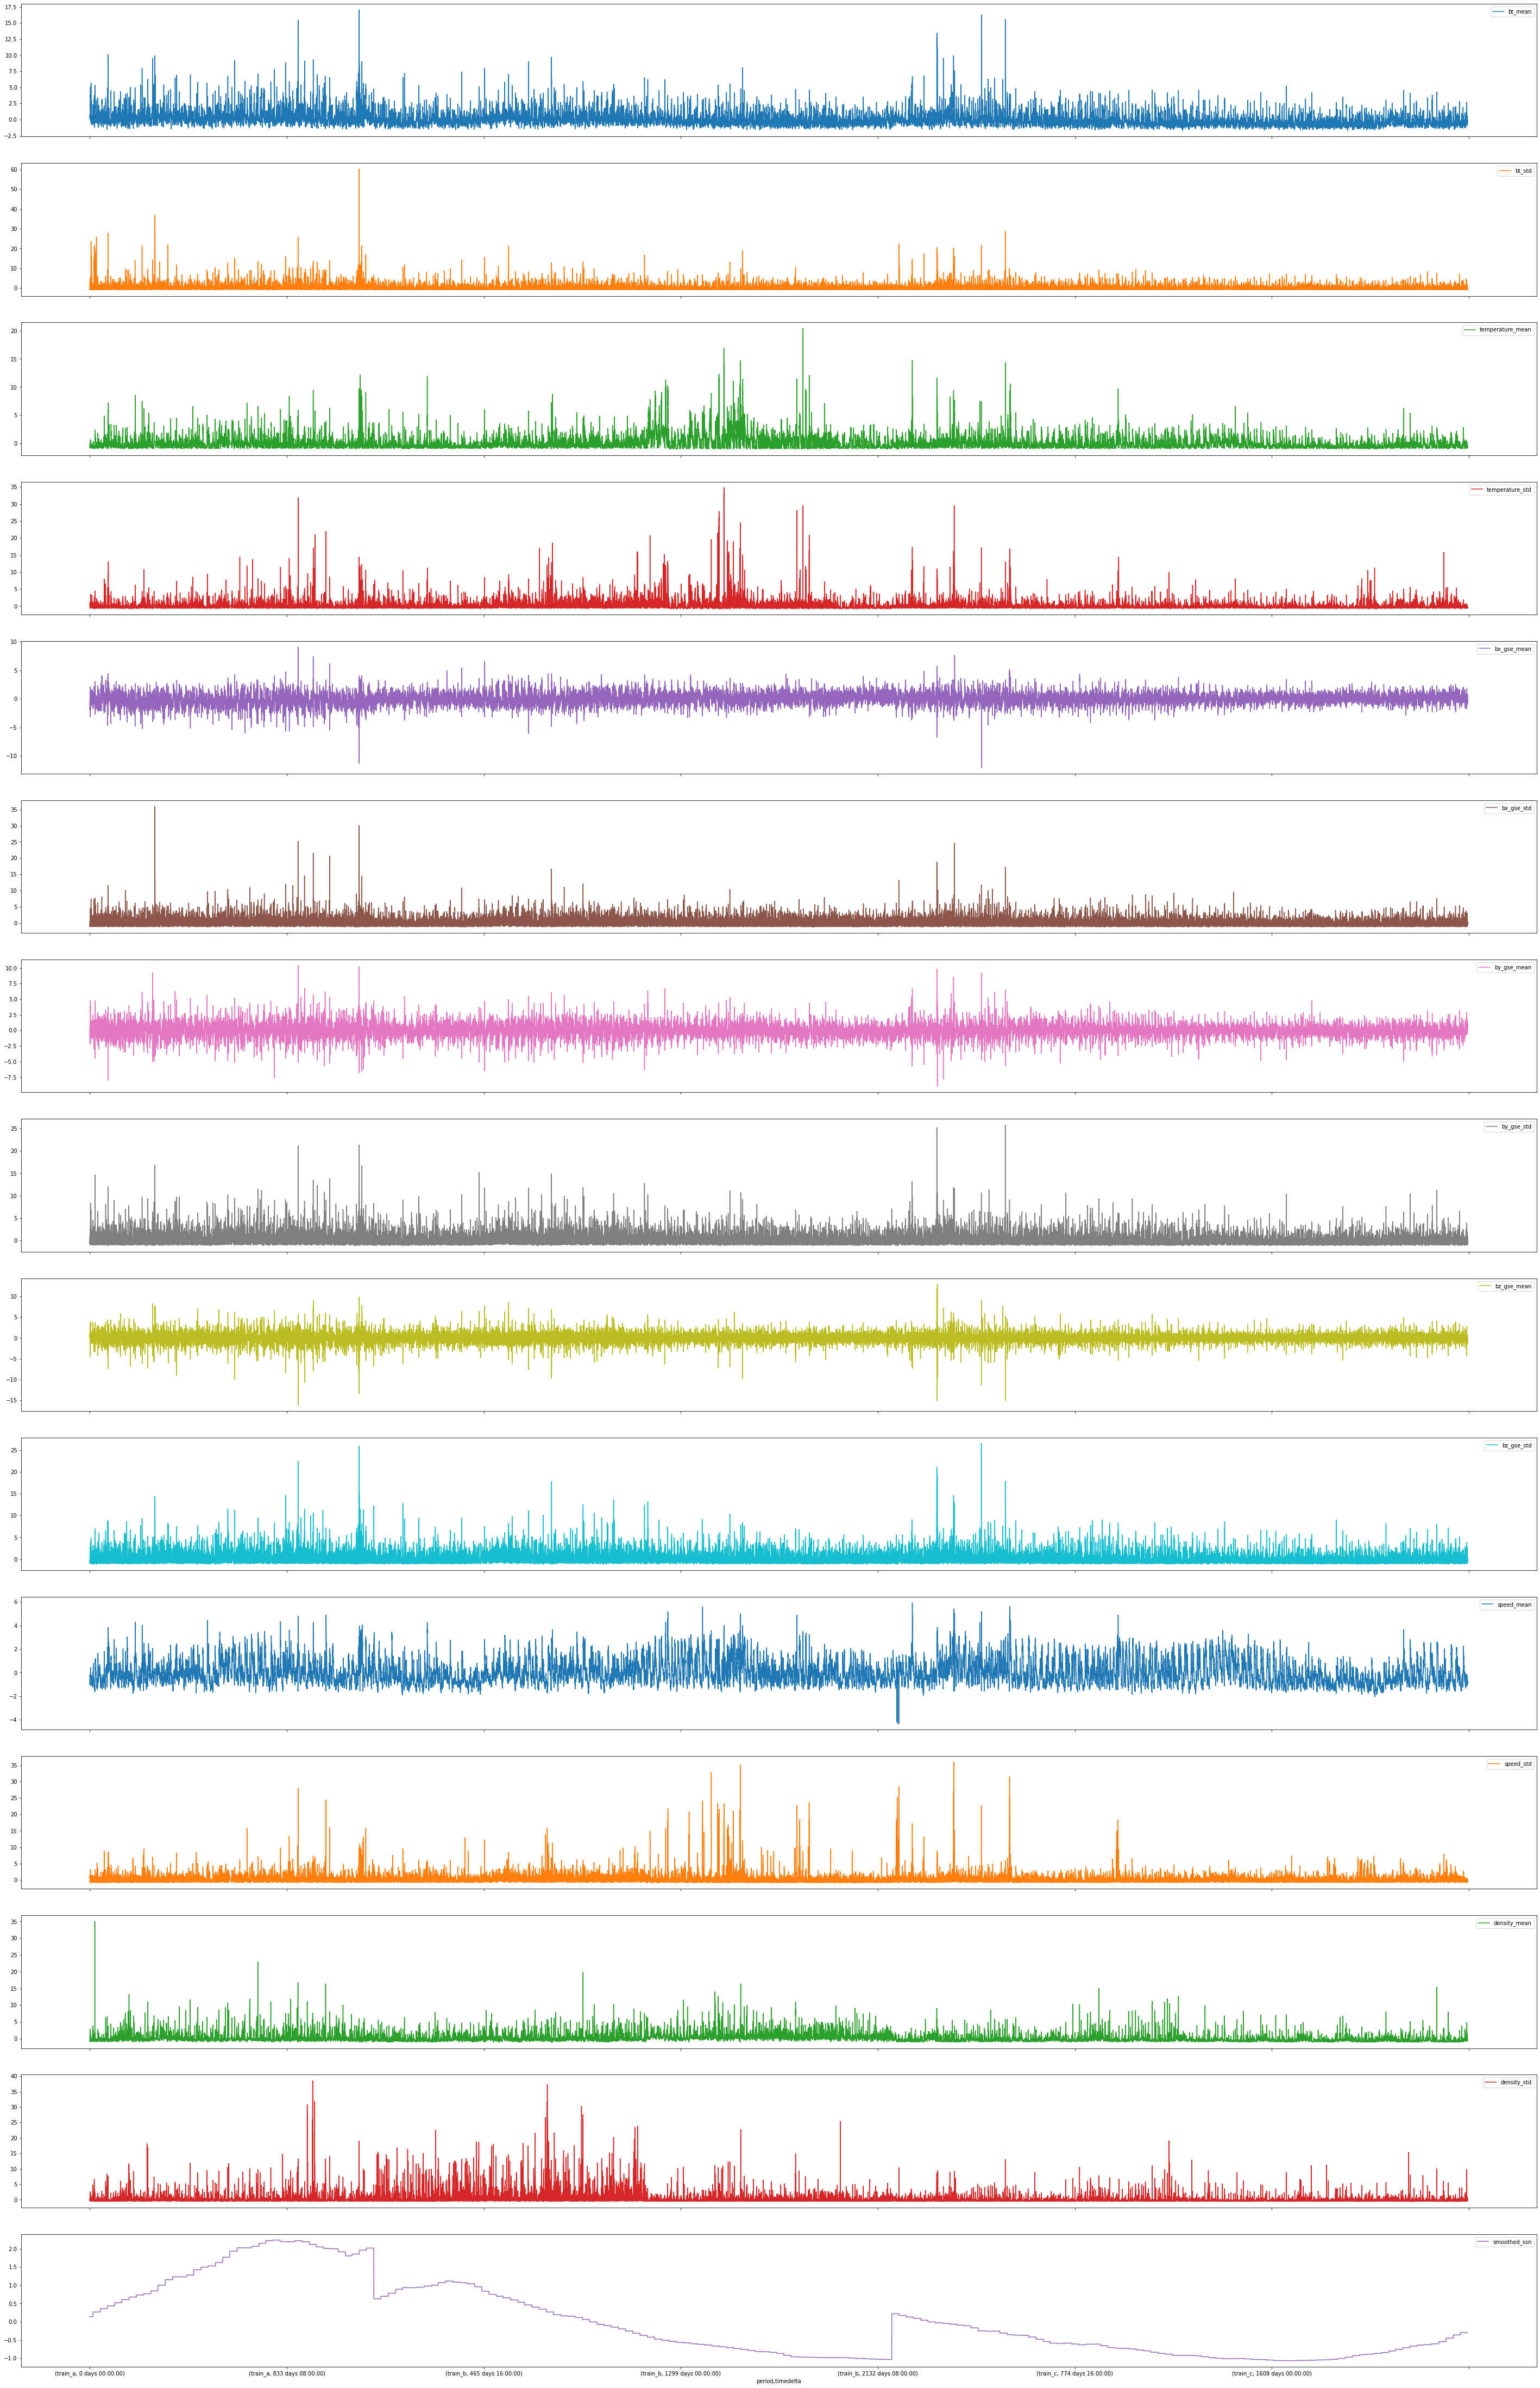

In [39]:
features.plot(subplots=True, figsize=(50,80))

In [45]:
print(features.index)
#features_a = features[features['period'] == 'train_a']

MultiIndex([('train_a',    '0 days 00:00:00'),
            ('train_a',    '0 days 01:00:00'),
            ('train_a',    '0 days 02:00:00'),
            ('train_a',    '0 days 03:00:00'),
            ('train_a',    '0 days 04:00:00'),
            ('train_a',    '0 days 05:00:00'),
            ('train_a',    '0 days 06:00:00'),
            ('train_a',    '0 days 07:00:00'),
            ('train_a',    '0 days 08:00:00'),
            ('train_a',    '0 days 09:00:00'),
            ...
            ('train_c', '2435 days 14:00:00'),
            ('train_c', '2435 days 15:00:00'),
            ('train_c', '2435 days 16:00:00'),
            ('train_c', '2435 days 17:00:00'),
            ('train_c', '2435 days 18:00:00'),
            ('train_c', '2435 days 19:00:00'),
            ('train_c', '2435 days 20:00:00'),
            ('train_c', '2435 days 21:00:00'),
            ('train_c', '2435 days 22:00:00'),
            ('train_c', '2435 days 23:00:00')],
           names=['period', 'timedelta'], l